# Scrapy the bulltets of 《隐秘的角落》

## 1. Get and clean the bullet data
## 2. Visual and analyze the bullet data

In [1]:
# import required modules
import pandas as pd
import numpy as np
import re
import jieba
import pyecharts

In [2]:
df_all = pd.read_csv(r"danmu2.csv", header=0, index_col= 0, encoding='utf-8-sig')
df = df_all.copy()

In [3]:
df.reset_index(drop=True) 
# drop = True will clean the original index
# for more information see https://blog.csdn.net/qq_36523839/article/details/80640139
df.head()

tv_name         uid           contentsId   contents  likeCount
index_label                                                               
0              第01集  1354611638  1592838562920007156    二刷的朋友有吗         19
1              第01集  1290387715  1592308702474009744    良心啊，一小时         78
2              第01集  1304178541  1592317555873002245       基本都好          9
3              第01集  1791773843  1593139392541001130     带你们去爬山          2
4              第01集  1581452867  1593150522156003497  这孩子演技很不错啊          0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201865 entries, 0 to 201864
Data columns (total 5 columns):
tv_name       201865 non-null object
uid           201865 non-null int64
contentsId    201865 non-null int64
contents      201865 non-null object
likeCount     201865 non-null int64
dtypes: int64(3), object(2)
memory usage: 9.2+ MB


In [5]:
danmu_counts = df.groupby('uid')['contentsId'].count().sort_values(ascending = False).reset_index()
danmu_counts.columns = ['用户Id', '累计发送的弹幕数量']
danmu_counts.head()

用户Id  累计发送的弹幕数量
0  1810351987       2561
1  1319063154        146
2  2244033948        131
3  2407948956        106
4  1488898523        104

In [6]:
df_top1 = df[df['uid'] == 1810351987].sort_values(by = 'likeCount', ascending = False).reset_index()
df_top1.head(10)

index_label tv_name         uid           contentsId      contents  \
0        48926    第03集  1810351987  1592396281667005291    感觉晶晶有点自作自受   
1        18370    第01集  1810351987  1592310435456006922  真的不能忽视了，心理健康   
2        48276    第03集  1810351987  1592401371493007155    这样的晶晶真的太坏了   
3        52807    第03集  1810351987  1592398904483005951    善恶永远都在一瞬间的   
4        97350    第06集  1810351987  1592483605611004816    哈哈，姜还是老的辣呀   
5        53405    第03集  1810351987  1592399003845007165   还是认为晶晶真的好任性   
6        71351    第04集  1810351987  1592398032950002734    哈哈哈哈张东升好机智   
7        78328    第05集  1810351987  1592483501326004084    总感觉王瑶也太狠了吧   
8        71459    第04集  1810351987  1592401777744000259   老陈对严良真的太好了吧   
9        65411    第04集  1810351987  1592396346696002728    朱永平只关心他的女儿   

   likeCount  
0        125  
1         96  
2         94  
3         81  
4         81  
5         77  
6         74  
7         73  
8         70  
9         66

In [7]:
data_top1 = df_top1.groupby('tv_name')['contentsId'].count()
data_top1

tv_name
第01集    355
第02集    359
第03集    249
第04集    273
第05集    160
第06集    176
第07集    274
第08集    194
第09集    170
第10集    233
第11集     72
第12集     46
Name: contentsId, dtype: int64

In [8]:
 from pyecharts.charts import Bar
from pyecharts import options as opts 

bar0 = Bar(init_opts=opts.InitOpts(width='960px', height='500px')) 
bar0.add_xaxis(data_top1.index.tolist())
bar0.add_yaxis("",data_top1.values.tolist()) 
bar0.set_global_opts(title_opts=opts.TitleOpts(title='弹幕发射器')) 
bar0.set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markline_opts=opts.MarkLineOpts(
            data=[opts.MarkLineItem(y=213.4, name="yAxis=213.4")]
        ))
bar0.render_notebook()

c:\users\907932\appdata\local\programs\python\python37\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [9]:
df.head()

tv_name         uid           contentsId   contents  likeCount
index_label                                                               
0              第01集  1354611638  1592838562920007156    二刷的朋友有吗         19
1              第01集  1290387715  1592308702474009744    良心啊，一小时         78
2              第01集  1304178541  1592317555873002245       基本都好          9
3              第01集  1791773843  1593139392541001130     带你们去爬山          2
4              第01集  1581452867  1593150522156003497  这孩子演技很不错啊          0

In [21]:
df_like = df[df.groupby(['tv_name'])['likeCount'].rank(method="first", ascending=False)==1].reset_index()[['tv_name','contents','likeCount']]
df_like.columns = ['剧集','弹幕','赞']
df_like

剧集                                弹幕     赞
0   第01集                    秦昊：爬山吗？一秒下山的那种  8305
1   第02集                         喊一句你大爷的试试  8889
2   第03集                       快吗？我待会还要收尸耶  8526
3   第04集                              好秃然啊  8451
4   第05集                          她才6岁就这么坏  8472
5   第06集                      我还有机会嘛＝你还想活嘛  7452
6   第07集                        爸爸觉得老师有问题？  3387
7   第08集  哈哈哈哈哈哈，气势汹汹，回首掏，板砖一收，走位走位，看不见看不见  5601
8   第09集                     升哥你也敢打，分分钟干死你  4533
9   第10集                       妈，我怕实话实说吓死你  4521
10  第11集                          女人的直觉太准了  3097
11  第12集                 我东哥：我假发一拿你们会更不习惯😏  6174

In [26]:
a = {'张东升':'东升|秦昊|张老师', 
     '朱朝阳':'朝阳', 
     '严良':'严良', 
     '普普':'普普', 
     '朱永平':'朱永平', 
     '周春红':'春红|大娘子', 
     '王瑶':'王瑶', 
     '徐静':'徐静|黄米依', 
     '陈冠声':'王景春|老陈|陈冠声', 
     '叶军':'叶军|皮卡皮卡', 
     '马主任':'主任|老马', 
     '朱晶晶':'晶晶',
     '叶驰敏':'叶驰敏'}

for key, value in a.items():
    df[key] = df['contents'].str.contains(value)
staff_count = pd.Series({key: df.loc[df[key], 'contentsId'].count() for key in a.keys()}).sort_values()

staff_count

马主任       2
朱朝阳      22
叶军       47
徐静       99
叶驰敏     125
朱永平     153
周春红     583
朱晶晶     818
王瑶     1462
陈冠声    1942
严良     5075
普普     5188
张东升    5734
dtype: int64

In [27]:
from pyecharts import options as opts
from pyecharts.charts import Polar
a = ['朱朝阳','叶军','徐静','叶驰敏','朱永平','周春红','朱晶晶','王瑶','陈冠声','严良','普普','张东升']
b = [22,47,99,125,153,583,818,1462,1942,5075,5188,5734]
Polar = Polar(init_opts=opts.InitOpts(width='960px', height='500px')) 

Polar.add_schema(angleaxis_opts=opts.AngleAxisOpts(data=a, type_= "category"))
Polar.add("", b, type_="bar")
Polar.set_global_opts(title_opts=opts.TitleOpts(title="弹幕中提到的主要演员"))
#word1.render("粽子商品名称词云图.html")
Polar.render_notebook()

c:\users\907932\appdata\local\programs\python\python37\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [32]:
def get_cut_words(content_series):
    import jieba
    stop_words = []
    
    with open('stop_words.txt', 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())
    
    # add key words
    my_words = ['张东升', '一小时', '1小时', '孩子他爸', '孩子他妈', '黄圣依', '无杜华版']      
    for i in my_words:
        jieba.add_word(i) 
        
    my_stop_words = ['真是', '一堆',]    
    stop_words.extend(my_stop_words) 
    
    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

In [33]:
text1 = get_cut_words(content_series=df.contents)
text1[:5] 

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\907932\AppData\Local\Temp\jieba.cache
Loading model cost 1.019 seconds.
Prefix dict has been built successfully.


['二刷', '朋友', '良心', '一小时', '爬山']

c:\users\907932\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
c:\users\907932\appdata\local\programs\python\python37\lib\site-packages\wordcloud\wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='c:\\users\\907932\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\wordcloud\\stopwords' mode='r' encoding='cp1252'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


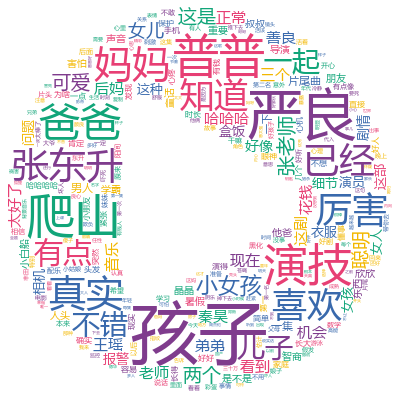

In [37]:
import stylecloud
from IPython.display import Image 

stylecloud.gen_stylecloud(text=' '.join(text1), collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fas fa-play-circle',size=400,
                          output_name='隐秘的角落-词云.png')
Image(filename='隐秘的角落-词云.png')